## Exercise 3: Entanglement
Write a program that will produce a quantum circuit with two qubits in order to obtain this $\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$ state using the principle of superposition and quantum entanglement.

The program must display the circuit, then run it on a quantum simulator with 500 shots and then display the results in a plot_histogram.

Be sure you understand the principle of quantum entanglement and the $\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$ notation before continuing.

#### Solution

0. Let $|\psi_0\rangle = |00\rangle$
1. Apply Hadamard Gate on first bit: $|\psi_1\rangle = |+0\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|10\rangle$
2. Apply CNOT Gate on second bit as first bit is for control: $|\psi_2\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$

Here $|\psi_2\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

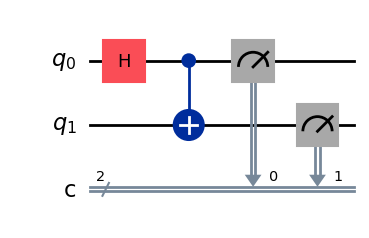

In [2]:
from qiskit import QuantumCircuit

# Create Circuit
qc = QuantumCircuit(2, 2) # 2 qubits, 2 classical bits
qc.h(0)  # Hadamard gate on qubit 0
qc.cx(0, 1) # CNOT gate from qubit 0 to qubit 1
qc.measure(range(2), range(2))  # Measure both qubits

qc.draw(output='mpl')  # Draw the circuit

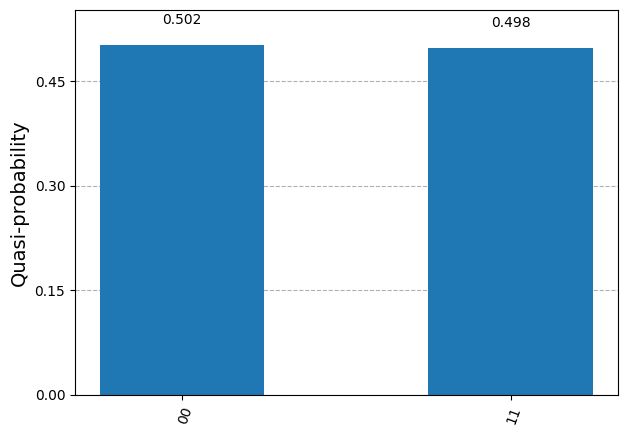

In [3]:
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_distribution

# Simulate Circuit
backend = Aer.get_backend('qasm_simulator')  # Get the Aer simulator
qc = transpile(qc, backend)  # Optimize and transpile
result = backend.run(qc, shots = 500).result()  # 500 shots
counts = result.get_counts(qc)

plot_distribution(counts)  # Plot the distribution